In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import re


files = ['nlp_out_' + str(i * 1000) + '.txt' for i in range(0, 151)]
# def form_dict(jap_tocs):
#     freq = defaultdict(int)
#     for tok in jap_tocs:
#         freq[tok] += 1
#     return freq

def parse_line(line):
    split_line = line.split('|')
    line_id = int(split_line[0])
    year = int(split_line[1])
    jap = split_line[2]
    
    split_jap = jap.split(',')

    resulting_string = ''
    for elem in split_jap:
        m = re.search('[a-zA-Z]', elem)
        if (m is not None) or (elem == ''):
            continue
        resulting_string += (elem + ' ')

    # print(resulting_string)
    return line_id, year, resulting_string

ids = []
years = []
docs = []

for file in files:
    in_file = open(file, 'r')
    for line in in_file:
        line_id, year, tokens = parse_line(line)
        ids.append(line_id)
        years.append(year)
        docs.append(tokens)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
Y = years


# X
# import matplotlib.pyplot as plt
# plt.figure(figsize = (40,20))
# plt.spy(X, markersize= 1)
# plt.savefig('plot.png')

# X



In [2]:
features = vectorizer.get_feature_names_out()

In [3]:
from scipy.sparse import csr_array, find
import numpy as np

row, col, val = find(X)
unique, counts = np.unique(col, return_counts=True)

counts = dict(zip(unique, counts))
# counts
counts_sorted = {features[k]: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
counts_sorted

{'いる': 50397,
 'ない': 48448,
 'こと': 43269,
 'もう': 39608,
 'なる': 32049,
 'ある': 31151,
 'まま': 28397,
 'なっ': 26874,
 '明日': 26118,
 '忘れ': 25896,
 'きっと': 25812,
 '言葉': 24672,
 'いい': 24631,
 'もの': 23990,
 '世界': 23273,
 'ゆく': 22309,
 '今日': 22129,
 'くれ': 22028,
 'ずっと': 21573,
 'また': 21438,
 '自分': 21325,
 'よう': 21233,
 'そう': 21005,
 '二人': 20576,
 '未来': 20191,
 '抱き': 19791,
 'どう': 19708,
 '生き': 19364,
 '笑顔': 19283,
 '信じ': 18877,
 'かけ': 18564,
 '想い': 18078,
 '出し': 18054,
 '好き': 17997,
 '思い': 17940,
 '少し': 17526,
 'まだ': 17423,
 '気持ち': 17222,
 '消え': 16633,
 '愛し': 16623,
 '見え': 16123,
 'しめ': 16118,
 '行く': 16115,
 '出す': 15805,
 'ただ': 15771,
 '時間': 15365,
 '知ら': 15245,
 'なく': 14258,
 '感じ': 14164,
 '日々': 14141,
 '場所': 14110,
 '泣い': 13892,
 '笑っ': 13879,
 'もっと': 13617,
 '幸せ': 13483,
 '遠く': 13454,
 'すぐ': 13366,
 'する': 13338,
 'いく': 13174,
 'つめ': 13025,
 '同じ': 12743,
 'そっと': 12495,
 '一人': 12449,
 'すべて': 12323,
 'ひとり': 12177,
 'たち': 11899,
 '待っ': 11897,
 '探し': 11664,
 'みんな': 11549,
 '強く': 11498,
 '全て': 11390

In [4]:

def year_2_decade(year):
    if year < 1980:
        return 1
    elif year >= 1980 and year < 1990:
        return 2
    elif year >= 1990 and year < 2000:
        return 3
    elif year >= 2000 and year < 2010:
        return 4
    elif year >= 2010 and year < 2020:
        return 5
    else:
        return 6

Y = [year_2_decade(year) for year in years]

unique_classes, counts_over_decades = np.unique(Y, return_counts=True)
print(unique_classes)
print(counts_over_decades)

Y = csr_array(Y).T

[1 2 3 4 5]
[   56  1453 24244 75713 49998]


In [5]:
from scipy.sparse import hstack

# Z = hstack([X, Y])
print(X.shape)
print(Y.shape)

Z = hstack([X, Y], format = 'csr')
Z
# import pandas as pd

# Z = pd.DataFrame(X.toarray())
# Z.head

classes_col = Z.shape[1] - 1

(151464, 140974)
(151464, 1)


In [6]:
from sklearn.model_selection import train_test_split

Z_train, Z_test = train_test_split(Z, test_size=0.1, shuffle=True, random_state=0, stratify=Z.getcol(classes_col).toarray())   
# разделим в на обучение/тест в заданной пропорции

In [7]:
def XY_split(Z, Y_col):
    '''Функция разбиения по признаки и отклики'''
    Y = Z.getcol(Y_col)
    X = Z[:, 0:Y_col - 1]
    # X = X.drop('Y',axis=1)
    return X, Y

X_train, Y_train = XY_split(Z_train, classes_col)
X_test, Y_test = XY_split(Z_test, classes_col)

In [11]:
from sklearn import neighbors
from sklearn import metrics
from sklearn.neighbors import NearestCentroid



# model = NearestCentroid()
# model.fit(X_train,Y_train)
# Y_hat = model.predict(X_test)



In [35]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(X_train,Y_train.toarray())
Y_hat = model.predict(X_test)

# show_accuracy(Y_test, Y_hat)

model.get_params()  # возвращает текущие параметры модели

/home/kudiko/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [39]:
Y_hat

array([4, 5, 4, ..., 5, 4, 4])

Accuracy: 0.41


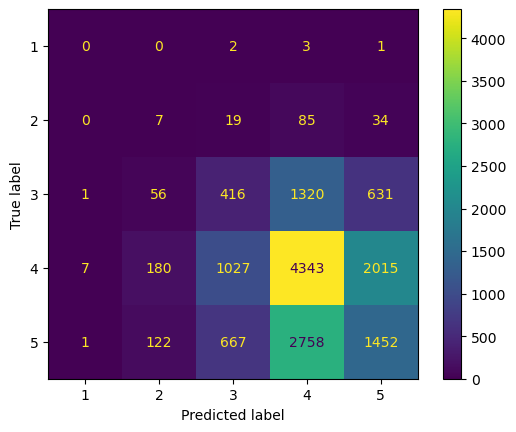

In [41]:
def show_accuracy(Y_test, Y_hat):
    acc = metrics.accuracy_score(Y_test.toarray(), Y_hat)
    print(f'Accuracy: {acc:.2f}')
    
    cm = metrics.confusion_matrix(Y_test.toarray(), Y_hat)   # матрица счётчиков true_class x predicted_class
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

show_accuracy(Y_test, Y_hat)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
    ('model', KNeighborsClassifier(n_neighbors=11))
    ])

search_space = {'model__n_neighbors':[1,3,5,7,9,11,15,21,31], 'model__p':np.linspace(1, 10, 10)}
np.random.seed(0)
grid_search = GridSearchCV(pipe, search_space, scoring='accuracy', refit=True, n_jobs=-1)    # n_jobs=-1: использовать все процессоры, а не один (по умолчанию)


In [45]:

grid_search.fit(X_train, Y_train.toarray())
grid_search.best_params_   # параметры наилучшего метода

/home/kudiko/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/kudiko/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/kudiko/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/kudiko/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [ ]:

Y_hat = grid_search.predict(X_test)    # можно предсказывать и объектом grid_search, если он был вызван с refit=True (по умолчанию)

show_accuracy(Y_test, Y_hat)